### 2주차 과제(전복데이터)의 분류/회귀를 CNN과 LSTM으로 분류 및 회귀를 작성하라

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-10-23 20:53:16.537346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [155]:
df = pd.read_csv("datas/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [156]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Label')

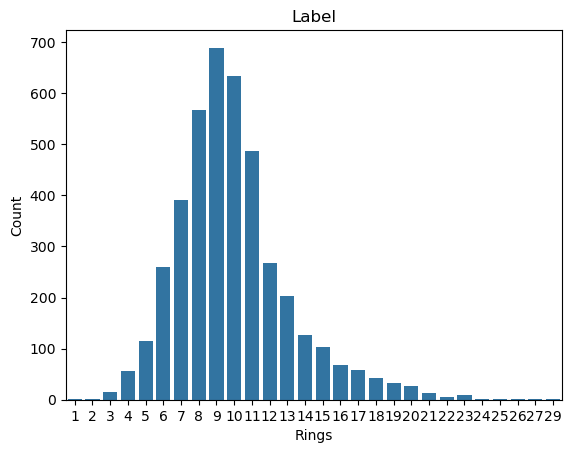

In [157]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Label")

In [158]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [159]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [160]:
total_count = len(df)
q1_count = total_count * 0.33
q2_count = total_count * 0.66

cumulative = df['Rings'].value_counts().sort_index().cumsum()
q1_rings = cumulative[cumulative >= q1_count].index[0]
q2_rings = cumulative[cumulative >= q2_count].index[0]
print(q1_rings, q2_rings)

8 11


In [161]:
bins = [0, q1_rings, q2_rings, 30]
df['Rings'] = pd.cut(df['Rings'], bins=bins, right=True).cat.codes
df['Rings']

id
0       2
1       0
2       1
3       1
4       0
       ..
4172    1
4173    1
4174    1
4175    1
4176    2
Name: Rings, Length: 4177, dtype: int8

In [162]:
df['Rings'].value_counts().sort_index()

Rings
0    1407
1    1810
2     960
Name: count, dtype: int64

In [163]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [164]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1,False,False,True


In [165]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  Length  Diameter    Height  Whole_weight  Shucked_weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole_weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked_weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera_weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell_weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.549238  0.566534  0.542407      0.545434        0.445484   
Sex_F           0.309666  0.318626  0.298421      0.299741        0.263991   
Sex_I          -0.551465 -0.564315 -0.518552     -0.557592       -0.521842   
Sex_M           0.236543  0.240376  0.215459      0.252038        0.251793   

                Viscera_weight  Shell_weight     Rings     Sex_

/opt/anaconda3/envs/deep-learning/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


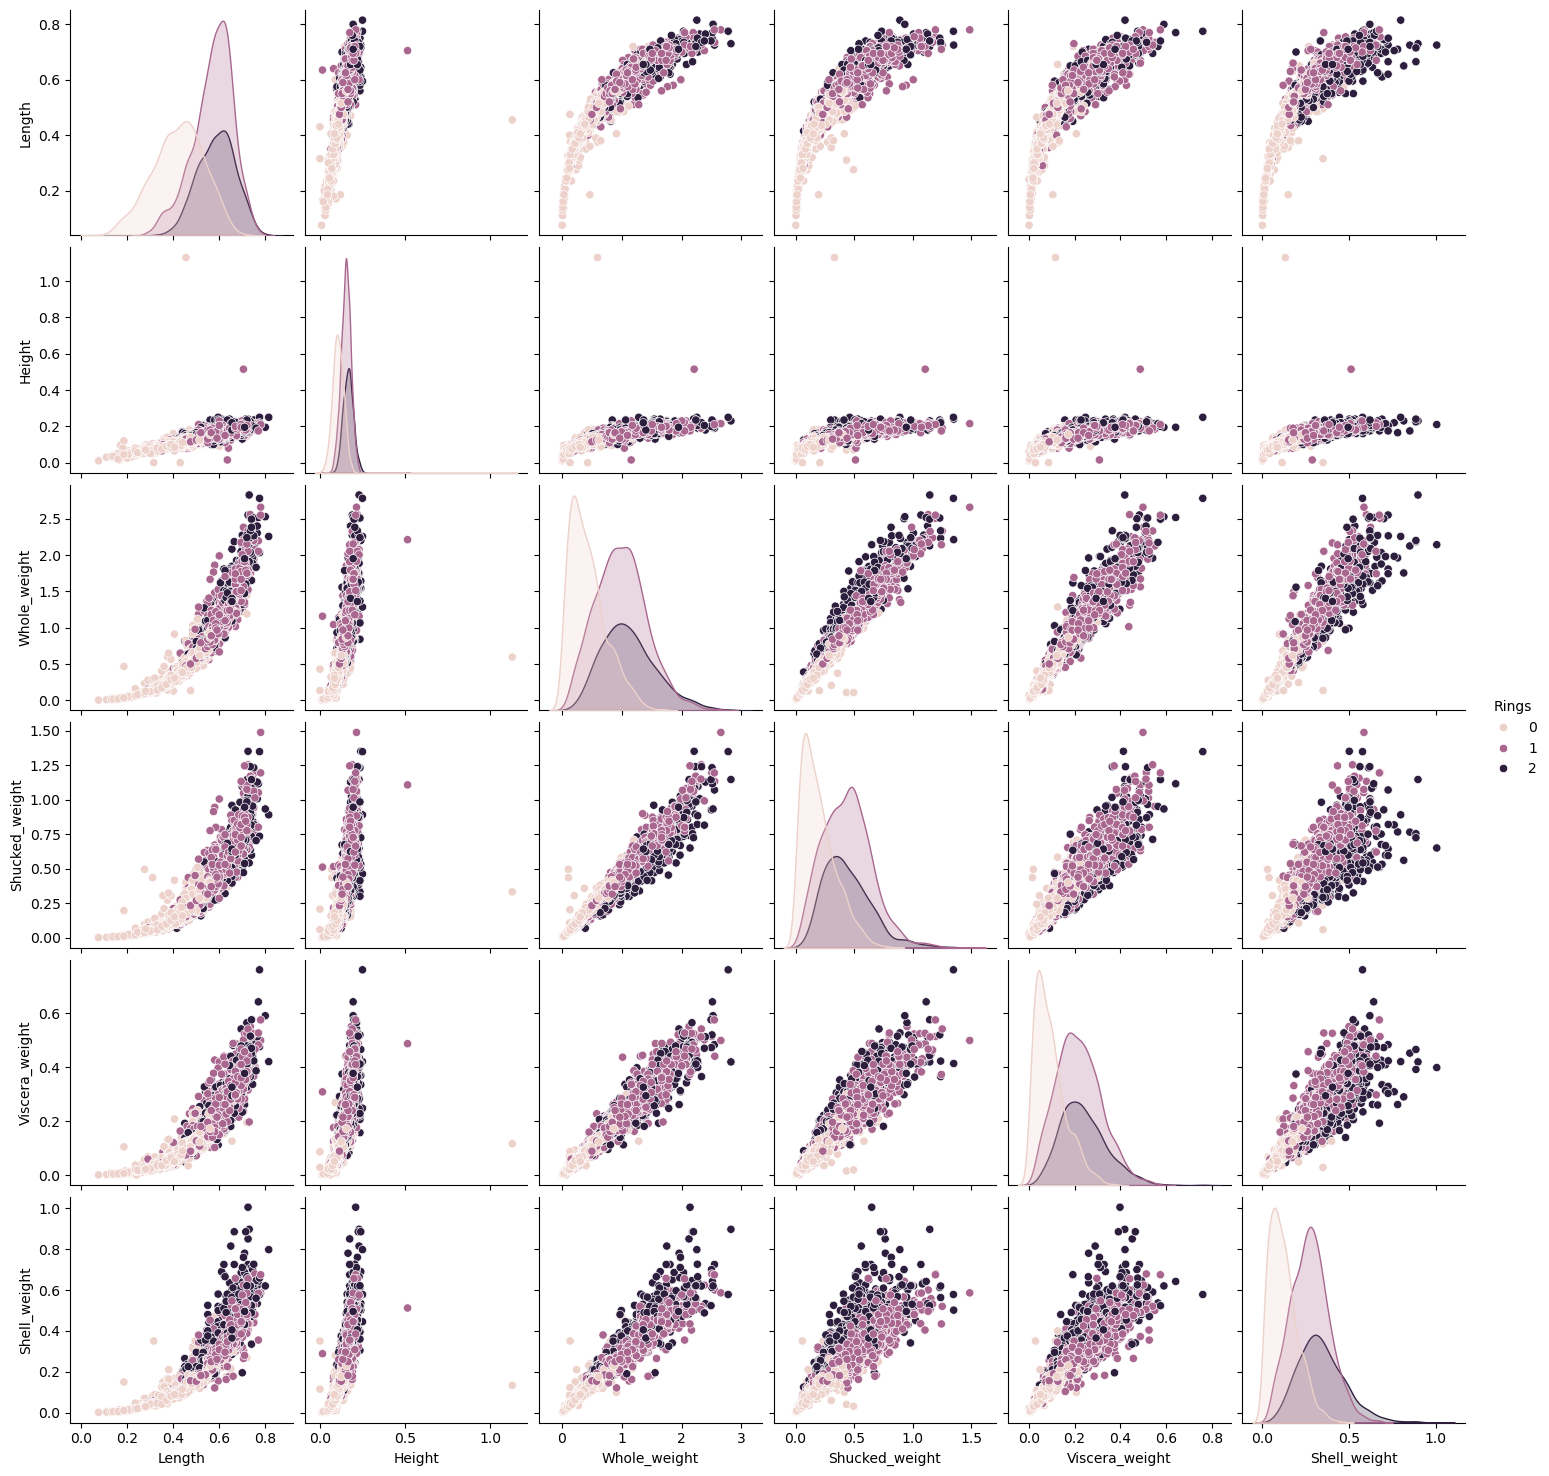

In [166]:
sns.pairplot(df,
             vars=['Length', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
             hue='Rings')
plt.show()

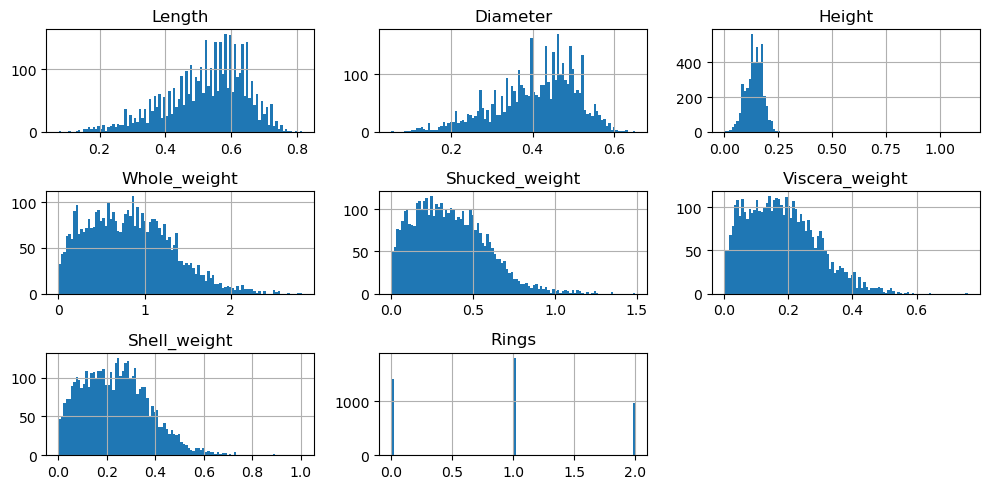

In [167]:
df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

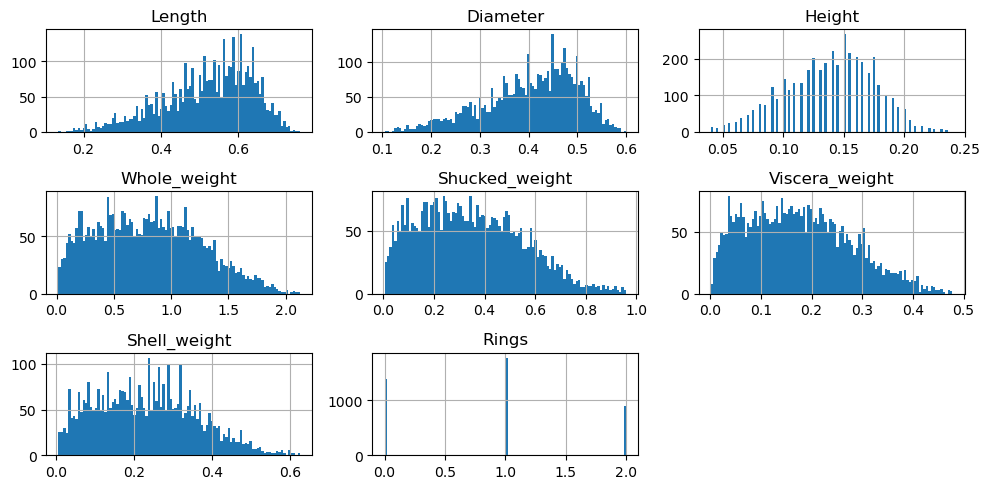

In [168]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

columns_to_check = ['Height', 'Shell_weight', 'Shucked_weight', 'Viscera_weight', 'Whole_weight']
df = remove_outliers(df, columns_to_check)

df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

## CNN 분류

In [180]:
X = df[columns_to_check]
X = X.values


In [181]:
from tensorflow.keras.utils import to_categorical
y = df['Rings']
y = to_categorical(y) 
y


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [172]:
print(X_train.shape) 
print(y_train.shape) 

(3244, 5, 1)
(3244, 3)


In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(3, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [174]:
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss}, 테스트 정확도: {test_accuracy}")

Epoch 1/10
82/82 [==============================] - 1s 4ms/step - loss: 1.0198 - accuracy: 0.4879 - val_loss: 0.9516 - val_accuracy: 0.5840
Epoch 2/10
82/82 [==============================] - 0s 2ms/step - loss: 0.8942 - accuracy: 0.5992 - val_loss: 0.8548 - val_accuracy: 0.6040
Epoch 3/10
82/82 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.6046 - val_loss: 0.8365 - val_accuracy: 0.6055
Epoch 4/10
82/82 [==============================] - 0s 2ms/step - loss: 0.8234 - accuracy: 0.6066 - val_loss: 0.8251 - val_accuracy: 0.6055
Epoch 5/10
82/82 [==============================] - 0s 2ms/step - loss: 0.8082 - accuracy: 0.6154 - val_loss: 0.8035 - val_accuracy: 0.6317
Epoch 6/10
82/82 [==============================] - 0s 2ms/step - loss: 0.7959 - accuracy: 0.6308 - val_loss: 0.7945 - val_accuracy: 0.6456
Epoch 7/10
82/82 [==============================] - 0s 2ms/step - loss: 0.7799 - accuracy: 0.6432 - val_loss: 0.7854 - val_accuracy: 0.6549
Epoch 8/10
82/82 [==

## LSTM 분류

In [185]:
print(f'X shape: {X.shape}')  # X의 형태
print(f'y shape: {y.shape}')

X shape: (4056, 5)
y shape: (4056, 3)


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [189]:
from keras.layers import LSTM, Dense
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(Dense(3, activation='softmax')) 
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [190]:
history = model_lstm.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model_lstm.evaluate(X_test, y_test)  # y_test 사용
print(f"테스트 손실: {test_loss}, 테스트 정확도: {test_accuracy}")

Epoch 1/40
82/82 [==============================] - 2s 9ms/step - loss: 1.0212 - accuracy: 0.4763 - val_loss: 0.9433 - val_accuracy: 0.5840
Epoch 2/40
82/82 [==============================] - 0s 3ms/step - loss: 0.8726 - accuracy: 0.6008 - val_loss: 0.8448 - val_accuracy: 0.6040
Epoch 3/40
82/82 [==============================] - 0s 3ms/step - loss: 0.8356 - accuracy: 0.6062 - val_loss: 0.8418 - val_accuracy: 0.6040
Epoch 4/40
82/82 [==============================] - 0s 3ms/step - loss: 0.8333 - accuracy: 0.6085 - val_loss: 0.8403 - val_accuracy: 0.6040
Epoch 5/40
82/82 [==============================] - 0s 4ms/step - loss: 0.8350 - accuracy: 0.6000 - val_loss: 0.8401 - val_accuracy: 0.6040
Epoch 6/40
82/82 [==============================] - 0s 4ms/step - loss: 0.8337 - accuracy: 0.6012 - val_loss: 0.8399 - val_accuracy: 0.6025
Epoch 7/40
82/82 [==============================] - 0s 3ms/step - loss: 0.8343 - accuracy: 0.6027 - val_loss: 0.8414 - val_accuracy: 0.5994
Epoch 8/40
82/82 [==

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


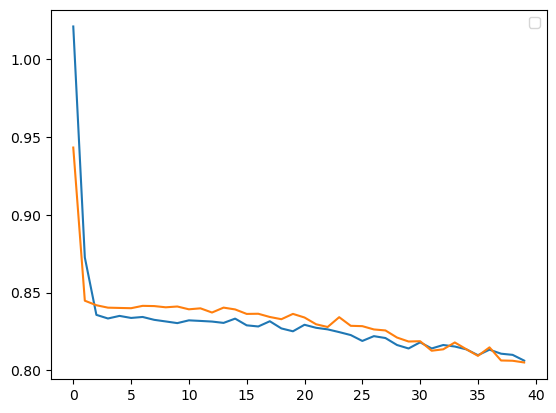

In [191]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

## CNN 회귀

In [237]:
df = pd.read_csv("datas/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


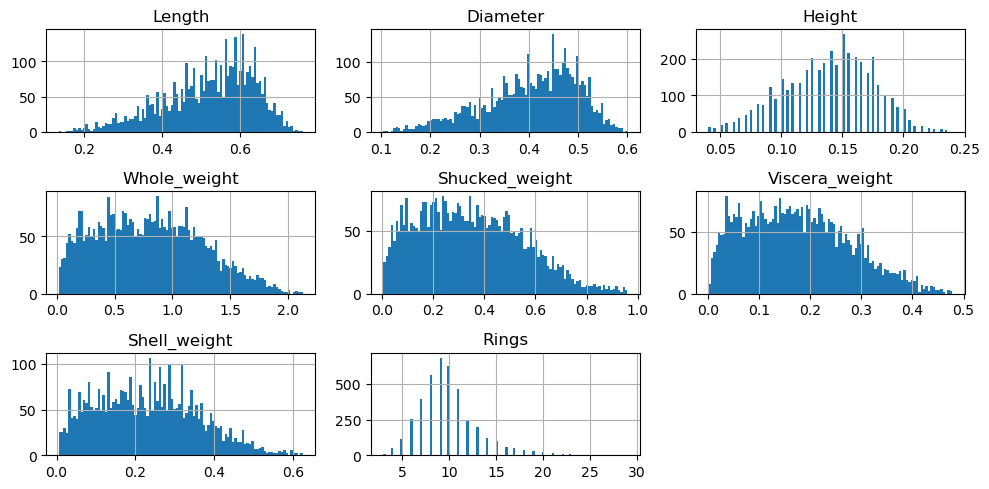

In [222]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

columns_to_check = ['Height', 'Shell_weight', 'Shucked_weight', 'Viscera_weight', 'Whole_weight']
df = remove_outliers(df, columns_to_check)

df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

In [238]:
y = df['Rings'].values   
y

array([15,  7,  9, ...,  9, 10, 12])

In [239]:
X = df[columns_to_check]
X = X.values

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = y_train.reshape(-1, 1) 
y_test = y_test.reshape(-1, 1)    

y_train = scaler_y.fit_transform(y_train) 
y_test = scaler_y.transform(y_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [251]:
model_regression = Sequential()
model_regression.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_regression.add(MaxPooling1D(pool_size=2))
model_regression.add(Flatten())
model_regression.add(Dense(64, activation='relu'))
model_regression.add(Dense(1, activation='linear')) 
model_regression.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [252]:
history = model_regression.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
84/84 [==============================] - 1s 3ms/step - loss: 0.0131 - mae: 0.0828 - val_loss: 0.0077 - val_mae: 0.0634
Epoch 2/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0081 - mae: 0.0655 - val_loss: 0.0066 - val_mae: 0.0613
Epoch 3/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0072 - mae: 0.0622 - val_loss: 0.0062 - val_mae: 0.0610
Epoch 4/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0068 - mae: 0.0601 - val_loss: 0.0057 - val_mae: 0.0552
Epoch 5/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0066 - mae: 0.0587 - val_loss: 0.0057 - val_mae: 0.0564
Epoch 6/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0065 - mae: 0.0587 - val_loss: 0.0056 - val_mae: 0.0521
Epoch 7/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0066 - mae: 0.0588 - val_loss: 0.0058 - val_mae: 0.0520
Epoch 8/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0064 - mae: 0.05

In [253]:
test_loss, test_mae = model_regression.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss}, 테스트 MAE: {test_mae}")

27/27 [==============================] - 0s 930us/step - loss: 0.0058 - mae: 0.0546
테스트 손실: 0.0057637570425868034, 테스트 MAE: 0.05459623038768768


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


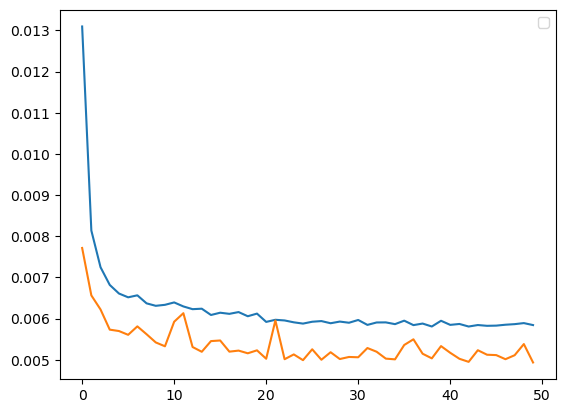

In [254]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

In [255]:
from sklearn.metrics import mean_squared_error
y_pred = model_regression.predict(X_test)  # 테스트 데이터에 대한 예측
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE 계산
print(f"테스트 데이터의 RMSE: {rmse}")

27/27 [==============================] - 0s 984us/step
테스트 데이터의 RMSE: 0.07591941532140713


In [256]:
y_pred = model_lstm.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
print("예측 값:", y_pred_rescaled.flatten())

27/27 [==============================] - 0s 1ms/step
예측 값: [11.51341   10.905878  13.121067  12.635001  10.990228  10.295217
 10.193113   9.443776   6.8017    11.256986  12.075986   7.013298
 10.166057   7.3162856  9.3089    12.815997  12.287869   9.584421
 14.1487255  9.069066  15.455765  12.465529  12.677889  12.059896
 10.931759   8.871203  10.182147   9.022075  11.270018  11.450382
 12.103289  11.847741   6.7088885 10.549458   9.48097   11.079131
  5.9524446  3.6015599  8.559224   6.2965717 12.674137  14.982314
 11.248627   9.975159  10.536807  12.805349  11.430646  10.274922
 10.81006    5.8924646  6.292721  14.87577    9.567273   4.3557982
  7.3691874 11.7291565 12.183006  12.990757  11.083385   6.841028
 13.099863  13.360273  10.800653   7.5214624  7.6454277 12.326543
  4.6998043  6.2930727  9.660718  11.452082  12.620982  10.930363
  7.8394938  8.795426   7.433397  11.832171  13.466781  12.632579
 11.463693  10.297803  10.884957  11.709618  12.07967    9.261936
  6.8675623 11.0

## LSTM 회귀

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = y_train.reshape(-1, 1) 
y_test = y_test.reshape(-1, 1)    

y_train = scaler_y.fit_transform(y_train) 
y_test = scaler_y.transform(y_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [248]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [249]:
history = model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
test_loss = model_lstm.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss}")

Epoch 1/30
84/84 [==============================] - 2s 8ms/step - loss: 0.0220 - val_loss: 0.0089
Epoch 2/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 3/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 4/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 5/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0083
Epoch 6/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 7/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 8/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 9/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0078
Epoch 10/30
84/84 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0080
Epoch 11/30
84/84 [

In [250]:
y_pred = model_lstm.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
print("예측 값:", y_pred_rescaled.flatten())

27/27 [==============================] - 0s 2ms/step
예측 값: [11.51341   10.905878  13.121067  12.635001  10.990228  10.295217
 10.193113   9.443776   6.8017    11.256986  12.075986   7.013298
 10.166057   7.3162856  9.3089    12.815997  12.287869   9.584421
 14.1487255  9.069066  15.455765  12.465529  12.677889  12.059896
 10.931759   8.871203  10.182147   9.022075  11.270018  11.450382
 12.103289  11.847741   6.7088885 10.549458   9.48097   11.079131
  5.9524446  3.6015599  8.559224   6.2965717 12.674137  14.982314
 11.248627   9.975159  10.536807  12.805349  11.430646  10.274922
 10.81006    5.8924646  6.292721  14.87577    9.567273   4.3557982
  7.3691874 11.7291565 12.183006  12.990757  11.083385   6.841028
 13.099863  13.360273  10.800653   7.5214624  7.6454277 12.326543
  4.6998043  6.2930727  9.660718  11.452082  12.620982  10.930363
  7.8394938  8.795426   7.433397  11.832171  13.466781  12.632579
 11.463693  10.297803  10.884957  11.709618  12.07967    9.261936
  6.8675623 11.0